#  <span style="color:blue">AutoML com Pycaret</span>

# Prática 06
Nesta aula prática vamos aprender e testar as diferentes formas de transformação de features que o Pycaret nos fornece.

#### Carregando o módulo de classificação e a função para buscar dados.

In [2]:
from pycaret.classification import *
from pycaret.datasets import get_data
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Conjunto de dados utilizado.

##### Carregando os dados.

In [3]:
dataset = get_data('wine')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


##### Separando os dados em X e Y.

In [4]:
X = dataset.drop(["type"],axis=1)
y = dataset["type"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

##### Instanciando o algoritmo e treinando o modelo.

In [7]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

##### Verificando as features importantes.

In [8]:
rf.feature_importances_

array([0.03263828, 0.16092728, 0.01729323, 0.0556893 , 0.27325654,
       0.06071936, 0.23590709, 0.07019716, 0.01884011, 0.06085321,
       0.01049977, 0.00317867])

##### Plot de features.

<BarContainer object of 12 artists>

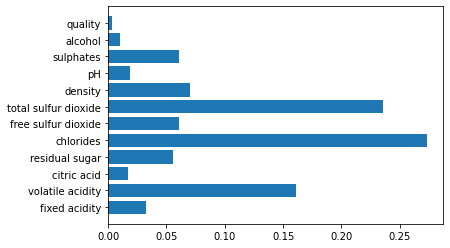

In [9]:
plt.barh(X.columns, rf.feature_importances_)

##### Plot ordenado

Text(0.5, 0, 'Random Forest Feature Importance')

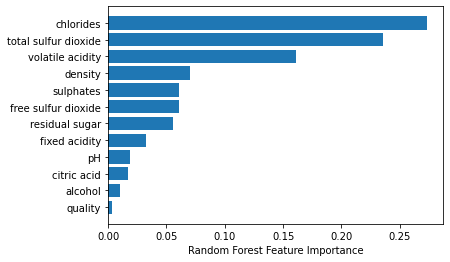

In [10]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(
            X.columns[sorted_idx], 
            rf.feature_importances_[sorted_idx],
    )
plt.xlabel("Random Forest Feature Importance")

In [11]:
for fn, fi in zip(X.columns[sorted_idx],rf.feature_importances_[sorted_idx]):
    print(fn, fi)

quality 0.003178666341251469
alcohol 0.010499765156234183
citric acid 0.017293228643199404
pH 0.018840109738443116
fixed acidity 0.03263828185019951
residual sugar 0.05568930159013421
free sulfur dioxide 0.060719362421069095
sulphates 0.06085321206333356
density 0.07019715930352151
volatile acidity 0.1609272813162388
total sulfur dioxide 0.2359070905237592
chlorides 0.27325654105261615


# Configurando o ambiente com a função Setup.

Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

In [25]:
exp_clf01 = setup(  data = dataset
                  , target = 'type'
                  , session_id = 123
                  , numeric_features = ["quality"]
                  , feature_selection = True
                  , feature_selection_threshold = 0.4
                  , silent = True
                  , verbose = True
                 )

,Description,Value
0,session_id,123
1,Target,type
2,Target Type,Binary
3,Label Encoded,"red: 0, white: 1"
4,Original Data,"(6497, 13)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


##### Armazenando o Dataframe transformado.

In [26]:
df_transformed = get_config("X_train")

In [27]:
df_transformed.head()

,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,volatile acidity
2457,6.7,10.2,0.038,149.0,0.99725,0.54,0.22
524,9.2,2.4,0.086,116.0,0.99760,0.64,0.43
4551,6.1,1.8,0.041,109.0,0.99290,0.54,0.27
5954,6.4,2.5,0.039,137.0,0.98946,0.38,0.31
3759,6.0,9.7,0.040,124.0,0.99540,0.48,0.33


##### Dataframe original.

In [28]:
dataset.drop(["type"],axis=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Quantitativo de features do dataset transformado.

In [29]:
len(df_transformed.columns)

7

##### Quantitativo de features do dataset original.

In [23]:
len(dataset.drop(["type"],axis=1).columns)

12